## Project: The Travelling Salesman

In [3]:
# All the modules needed for this project
import numpy as np  
import numpy.random as random  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import copy
import random
import math

%matplotlib inline

In [4]:
# Importing the US map as an image file
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
map = mpimg.imread("map.png")

# List of 30 US state capitals and corresponding coordinates on the map
with open('capitals.json', 'r') as capitals_file:
    capitals = json.load(capitals_file)

capitals_list = list(capitals.items())
capitals_list = [(c[0], tuple(c[1])) for c in capitals_list]
# if this [ ... for ... in ... ] syntax is unfamilier look up python list comprehension 

In [5]:
def coord(path):
    """Strip the city name from each element of the path list and return
    a list of tuples containing only pairs of xy coordinates for the
    cities. For example,
    [("Atlanta", (585.6, 376.8)), ...] -> [(585.6, 376.8), ...]
    """
    _, coord = path
    return coord

def coords(path):
    """"Srip the city name from each element of the path list and return 
    a list of the tuples containnig only pairs of xy coordinates for the
    cities. For example, 
    """
    
    _, coords = zip(*path)
    return coords

def show_path(path_, w=35, h=15):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    path = coords(path_)
    x, y = list(zip(*path))

    x0, y0 = path_[0][1]  # Use the coordinates of the first city in the path
    plt.imshow(map)
    plt.plot(x0, y0, 'y*', markersize=15)  # y* = yellow star for starting point
    plt.plot(x + x[:1], y + y[:1])  # include the starting point at the end of path
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

In [6]:
def temperature_schedule(t, alpha, T0):
    """"
    t: time step
    alpha: Cooling rate how quickly tempertaure decreases
    T0: initial temeprature
    """
    return T0 * (alpha ** t)

In [7]:
def generate_random_path(capitals_list):
    """
    Generate a random path that visits each city once and returns to the starting city.
    
    Parameters:
    capitals_list : list
        A list of tuples where each tuple contains a city name and its coordinates.
    
    Returns:
    list
        A random path represented as a list of tuples.
    """
    # Shuffle the city list to create a random order of 30 US cties
    random.shuffle(capitals_list)
    random_path = capitals_list[:30]
    # Complete the loop by adding the starting city to the end
    random_path.append(capitals_list[0])
    
    return random_path

In [8]:
def pairwise_exchange(path):
    """
    Perform a pairwise exchange operation on a given path, swapping the positions of two cities.

    Parameters:
    - path (list): A list representing the order of cities in the current path.

    Returns:
    - new_path (list): A new path obtained by randomly swapping two cities in the original path.
    """
    new_path = path.copy()  # Make a copy of the original path
    i, j = random.sample(range(len(new_path)), 2)  # Choose two random indices to swap
    # Use modulo to handle cases where indices go beyond the length of the path
    i %= len(new_path)
    j %= len(new_path)
    new_path[i], new_path[j] = new_path[j], new_path[i]  # Swap the cities at indices i and j
    return new_path

In [9]:
def calculate_path_length(path):
    """
    Calculate the total length of a circular path.

    Parameters:
    - path: A list of tuples containing city names and their coordinates.

    Returns:
    - total_length: The total length of the circular path.
    """
    # Extract coordinates from the path
    _, coords = zip(*path)

    # Include the starting point at the end of the path to create a circular path
    total_path = list(coords) + [coords[0]]

    # Calculate the length of each segment in the circular path using list comprehension
    distances = []
    for (x1, y1), (x2, y2) in zip(total_path, total_path[1:]):
        distance = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
        distances.append(distance)

    # Sum up the lengths of all segments to get the total path length
    total_length = sum(distances)

    return total_length

In [10]:
# Function to perform simulated annealing
def simulated_annealing(capitals_list, num_cities, alpha, T0, num_attempts):
    # Initialize variables
    current_path = generate_random_path(capitals_list)
    current_length = calculate_path_length(current_path)
    best_path = current_path
    best_length = current_length

    temperatures = []
    distances = []

    # Simulated annealing algorithm
    for t in range(num_attempts):
        T = temperature_schedule(t, alpha, T0)
        new_path = pairwise_exchange(current_path)
        new_length = calculate_path_length(new_path)

        # Calculate probability of accepting the new path
        probability = np.exp(-(new_length - current_length) / T)

        # Accept or reject the new path based on probability
        if random.random() < probability:
            current_path = new_path
            current_length = new_length

        if current_length < best_length:
            best_path = current_path
            best_length = current_length

        temperatures.append(T)
        distances.append(best_length)

    return best_path, distances

In [11]:
# Repeat simulated annealing 20 times
num_simulations = 20
alpha = 0.99
T0 = 1e10
num_attempts = 5000

best_distances = []
best_paths = []
for _ in range(num_simulations):
    best_path, distances = simulated_annealing(capitals_list, len(capitals_list)-1, alpha, T0, num_attempts)
    best_paths.append(best_path)
    best_distances.append(distances[-1])

# Display the best distances and paths for each simulation
for i in range(num_simulations):
    print(f"Simulation {i + 1}:\nBest Distance = {best_distances[i]},\nBest Path = {best_paths[i]}")
    print()

/var/folders/d5/h7cq_87x0qsfc5jr3m__py9r0000gn/T/ipykernel_25729/1360760402.py:19: RuntimeWarning: overflow encountered in exp
  probability = np.exp(-(new_length - current_length) / T)


Simulation 1:
Best Distance = 2933.2691675581655,
Best Path = [('Salem', (80.0, 139.2)), ('Sacramento', (68.4, 254.0)), ('Salt Lake City', (204.0, 243.2)), ('Phoenix', (179.6, 371.2)), ('Austin', (389.2, 448.4)), ('Baton Rouge', (489.6, 442.0)), ('Tallahassee', (594.8, 434.8)), ('Columbia', (632.4, 364.8)), ('Richmond', (673.2, 293.6)), ('Trenton', (698.8, 239.6)), ('Albany', (702.0, 193.6)), ('Boston', (738.4, 190.8)), ('Providence', (735.2, 201.2)), ('Hartford', (719.6, 205.2)), ('Raleigh', (662.0, 328.8)), ('Atlanta', (585.6, 376.8)), ('Montgomery', (559.6, 404.8)), ('Nashville', (546.4, 336.8)), ('Indianapolis', (548.0, 272.8)), ('Madison', (500.8, 217.6)), ('Saint Paul', (451.6, 186.0)), ('Des Moines', (447.6, 246.0)), ('Oklahoma City', (392.8, 356.4)), ('Little Rock', (469.2, 367.2)), ('Jackson', (501.6, 409.6)), ('Columbus', (590.8, 263.2)), ('Harrisburg', (670.8, 244.0)), ('Trenton', (698.8, 239.6)), ('Lansing', (563.6, 216.4)), ('Denver', (293.6, 274.0)), ('Boise', (159.6, 182

Overall Best Distance = 2494.912149403046

Overall Best Path = [('Hartford', (719.6, 205.2)), ('Boston', (738.4, 190.8)), ('Providence', (735.2, 201.2)), ('Trenton', (698.8, 239.6)), ('Harrisburg', (670.8, 244.0)), ('Richmond', (673.2, 293.6)), ('Nashville', (546.4, 336.8)), ('Little Rock', (469.2, 367.2)), ('Jackson', (501.6, 409.6)), ('Baton Rouge', (489.6, 442.0)), ('Montgomery', (559.6, 404.8)), ('Tallahassee', (594.8, 434.8)), ('Atlanta', (585.6, 376.8)), ('Atlanta', (585.6, 376.8)), ('Columbia', (632.4, 364.8)), ('Raleigh', (662.0, 328.8)), ('Columbus', (590.8, 263.2)), ('Indianapolis', (548.0, 272.8)), ('Madison', (500.8, 217.6)), ('Saint Paul', (451.6, 186.0)), ('Des Moines', (447.6, 246.0)), ('Oklahoma City', (392.8, 356.4)), ('Austin', (389.2, 448.4)), ('Phoenix', (179.6, 371.2)), ('Sacramento', (68.4, 254.0)), ('Salem', (80.0, 139.2)), ('Boise', (159.6, 182.8)), ('Salt Lake City', (204.0, 243.2)), ('Denver', (293.6, 274.0)), ('Lansing', (563.6, 216.4)), ('Albany', (702.0, 19

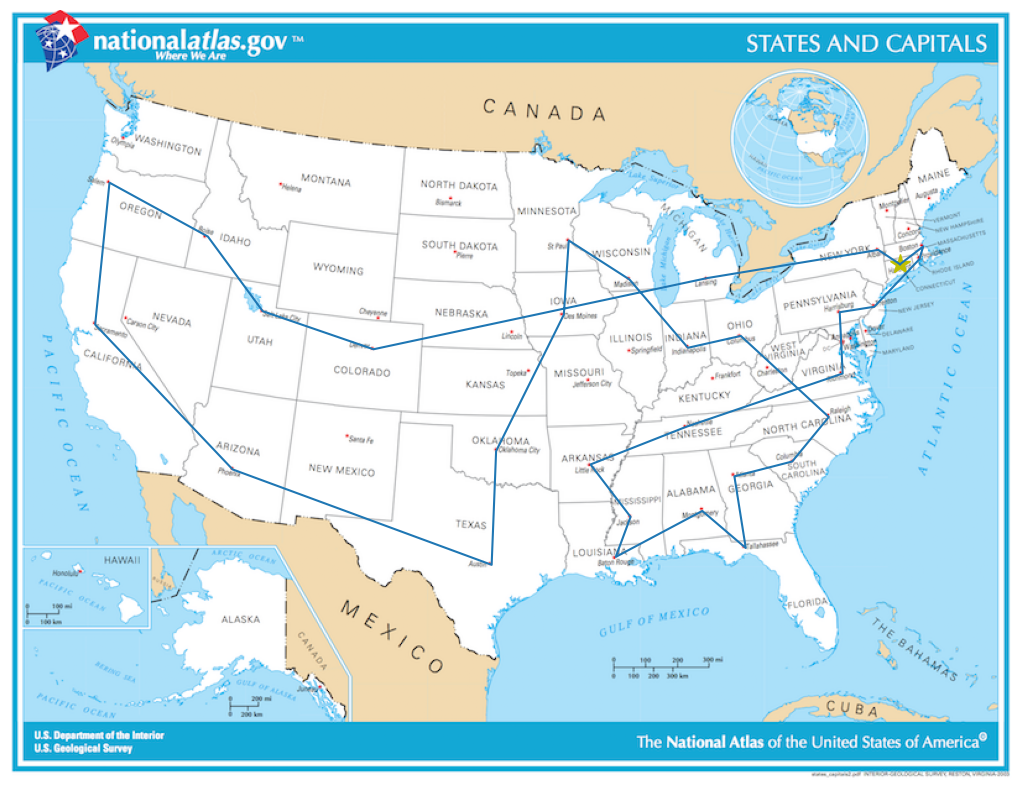

In [12]:
# Find the overall best solution
overall_best_index = np.argmin(best_distances)
overall_best_distance = best_distances[overall_best_index]
overall_best_path = best_paths[overall_best_index]
# Display the overall best solution\
print(f"Overall Best Distance = {overall_best_distance}")
print()
print(f"Overall Best Path = {overall_best_path}")
print()

# Visualize the overall best path on the map
show_path(overall_best_path, w=20, h=10)